주성분분석-유방암
==
- 주성분 분석
- 30% 중요 데이터만 사용 SelectPercentile
- tSNE 

In [139]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [153]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
np.random.seed(11)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

X_train.shape

(398, 30)

In [157]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 30개의 특성을 모두 사용하는 경우

In [142]:
rfc = RandomForestClassifier(n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test).round(4)

0.9649

## 2개의 특성만 사용하는 경우

In [143]:
# 특성의 이름을 컬럼 명으로 지정
X_train = pd.DataFrame(X_train, columns = cancer.feature_names)
# 상위 20%의 유효한 특성만 선택 (6개))
fs = SelectPercentile(feature_selection.chi2, percentile = 6)
X_train_P = fs.fit_transform(X_train, y_train)
X_train.columns[fs.get_support()]

Index(['mean area', 'worst area'], dtype='object')

In [144]:
columns_new=X_train.columns[fs.get_support()] 
X_test_P = fs.transform(X_test)

rfc_P = RandomForestClassifier(n_estimators=300) 
rfc_P.fit(X_train_P, y_train)
rfc_P.score(X_test_P, y_test).round(4)

0.9181

In [145]:
X_train_P.shape

(398, 2)

## PCA로 두개의 차원만 사용하는 경우

In [147]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

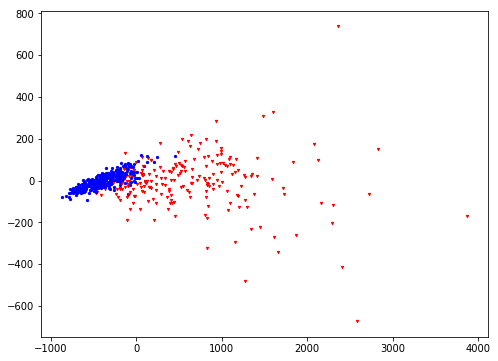

In [148]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

In [156]:
pca.components_.round(3)

array([[ 0.005,  0.002,  0.035,  0.517,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   , -0.   ,  0.   , -0.   ,  0.002,  0.056, -0.   ,  0.   ,
         0.   ,  0.   , -0.   , -0.   ,  0.007,  0.003,  0.049,  0.852,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.009, -0.003,  0.063,  0.852, -0.   , -0.   ,  0.   ,  0.   ,
        -0.   , -0.   , -0.   ,  0.   ,  0.001,  0.008,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   , -0.001, -0.013, -0.   , -0.52 ,
        -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ]])

In [152]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.98204467, 0.01617649]), 0.9982211613741719)

## tSNE 시각화

In [130]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.005s...
[t-SNE] Computed neighbors for 569 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.210552
[t-SNE] Error after 1000 iterations: 0.216433


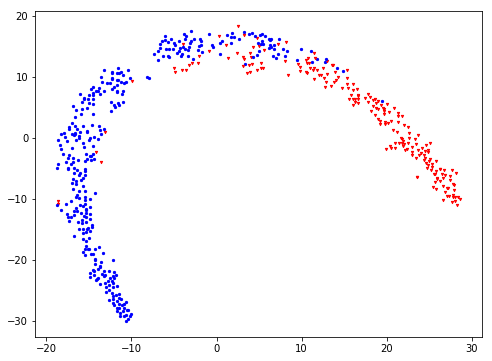

In [131]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

### 표준화 후 시각화

In [132]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

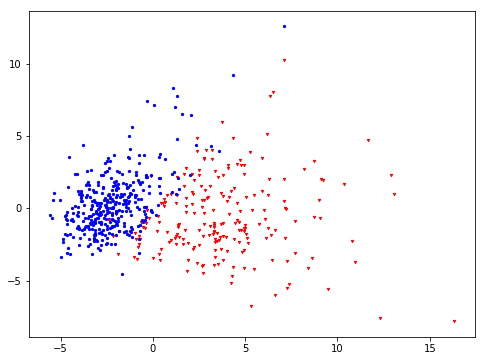

In [134]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

In [135]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.656212
[t-SNE] Error after 1000 iterations: 0.863724


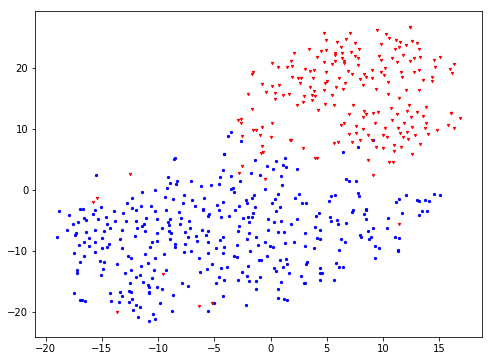

In [137]:
# m = ['v','o']
# c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()